In [25]:
!conda activate gymenv

In [26]:
import pandas as pd

In [27]:
from one.api import ONE

In [28]:
ONE.setup(base_url='https://openalyx.internationalbrainlab.org', silent=True)
one = ONE(password='international')

Exception ignored in: <function One.__del__ at 0x000001C8DC61F1A0>
Traceback (most recent call last):
  File "c:\Users\Yash\anaconda3\envs\gymenv\Lib\site-packages\one\api.py", line 104, in __del__
    self.save_cache()
  File "c:\Users\Yash\anaconda3\envs\gymenv\Lib\site-packages\one\api.py", line 228, in save_cache
    parquet.save(filename, df, metadata)
  File "c:\Users\Yash\anaconda3\envs\gymenv\Lib\site-packages\iblutil\io\parquet.py", line 45, in save
    'one_metadata': json.dumps(metadata or {}).encode(),
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Yash\anaconda3\envs\gymenv\Lib\json\__init__.py", line 231, in dumps
    return _default_encoder.encode(obj)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Yash\anaconda3\envs\gymenv\Lib\json\encoder.py", line 200, in encode
    chunks = self.iterencode(o, _one_shot=True)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Yash\anaconda3\envs\gymenv\Lib\json\encoder.py", line 258, in iteren

Connected to https://openalyx.internationalbrainlab.org as user "intbrainlab"


In [29]:
ids = one.search(task_protocol='biasedChoiceWorld')

In [30]:
id=ids[0]
trials= one.load_object(id, 'trials')

In [31]:
data = {}

for key in trials.keys():
    if trials[key].ndim == 1:
        data[key] = trials[key]

df = pd.DataFrame(data)

In [32]:
df.head()

,feedback_times,probabilityLeft,contrastLeft,feedbackType,goCue_times,stimOn_times,choice,rewardVolume,firstMovement_times,contrastRight,response_times
0,44.3375,0.5,NaN,-1.0,4.3596,NaN,1.0,0.0,44.008799,0.25,44.3080
1,49.4592,0.5,NaN,1.0,48.2709,48.2343,-1.0,1.5,49.212799,1.00,49.4591
2,53.5256,0.5,NaN,-1.0,53.3486,53.3175,1.0,0.0,53.262799,0.00,53.4814
3,57.7641,0.5,NaN,-1.0,56.9990,56.9674,1.0,0.0,57.131799,0.00,57.7335
4,64.1309,0.5,NaN,-1.0,62.4577,62.4259,1.0,0.0,63.624799,0.00,64.0981


In [33]:
df.to_csv("trials.csv", index=False)

In [34]:
df.describe()

,feedback_times,probabilityLeft,contrastLeft,feedbackType,goCue_times,stimOn_times,choice,rewardVolume,firstMovement_times,contrastRight,response_times
count,739.000000,739.000000,331.000000,739.000000,739.000000,738.000000,739.000000,739.000000,739.000000,408.000000,739.000000
mean,1707.484921,0.463058,0.261896,0.393775,1705.928072,1708.202855,0.171854,1.045332,1707.157119,0.299939,1707.474824
std,1011.972823,0.278890,0.353972,0.919829,1011.415538,1010.156170,0.985790,0.689872,1011.938885,0.386613,1011.972804
min,44.337500,0.200000,0.000000,-1.000000,4.359600,48.234300,-1.000000,0.000000,44.008799,0.000000,44.308000
25%,838.249050,0.200000,0.062500,-1.000000,837.968450,840.651250,-1.000000,0.000000,838.034299,0.062500,838.248950
50%,1689.088600,0.200000,0.125000,1.000000,1682.970700,1687.445800,1.000000,1.500000,1689.028799,0.125000,1689.088500
75%,2549.141299,0.800000,0.250000,1.000000,2547.509749,2548.844824,1.000000,1.500000,2548.995299,0.250000,2549.141199
max,3696.402899,0.800000,1.000000,1.000000,3678.015199,3677.983899,1.000000,1.500000,3696.201799,1.000000,3696.402799


In [35]:
df['action_time']=df['response_times']-df['firstMovement_times']
df['action_time'].describe()

count    739.000000
mean       0.317704
std        1.041533
min        0.057901
25%        0.152901
50%        0.208300
75%        0.260801
max       25.978800
Name: action_time, dtype: float64

In [41]:
exclude_columns = [
    'rewardVolume', 'firstMovement_times', 'response_times',
    'probabilityLeft', 'contrastLeft', 'goCue_times',
    'stimOn_times', 'contrastRight', 'choice']
df2=df.drop(columns=exclude_columns)

In [42]:
min_ft_val=df2['feedback_times'].min()
max_ft_val=df2['feedback_times'].max()

min_at_val=df2['action_time'].min()
max_at_val=df2['action_time'].max()

In [43]:
df3=df2.copy()

In [61]:
df3['feedback_times']=(df2['feedback_times']-min_ft_val)/(max_ft_val-min_ft_val)
df3['feedback_times']=(df2['feedback_times']-min_ft_val)/(max_ft_val-min_ft_val)

df3['action_time']=(df2['action_time']-min_at_val)/(max_at_val-min_at_val)
df3['action_time']=(df2['action_time']-min_at_val)/(max_at_val-min_at_val)

df3['feedback_times']=df3['feedback_times'].diff()
df3['feedback_times']=df3['feedback_times'].diff().fillna(0)
df3['feedback_times']=df3['feedback_times']*100

df3['feedbackType']=df2['feedbackType']

C:\Users\Yash\AppData\Local\Temp\ipykernel_11340\1551496749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['feedback_times']=(df2['feedback_times']-min_ft_val)/(max_ft_val-min_ft_val)
C:\Users\Yash\AppData\Local\Temp\ipykernel_11340\1551496749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['feedback_times']=(df2['feedback_times']-min_ft_val)/(max_ft_val-min_ft_val)
C:\Users\Yash\AppData\Local\Temp\ipykernel_11340\1551496749.py:4: SettingWithCopyWarning: 
A value is trying to be set on a co

In [62]:
# Keep only rows where feedback_diff is greater than or equal to 0
df3 = df3[df3['feedback_times'] >= 0]

In [63]:
df3.head()

,feedback_times,feedbackType,action_time
0,0.000000,-1.0,0.009309
1,0.000000,1.0,0.007268
3,0.087162,-1.0,0.020979
5,0.055426,-1.0,0.112654
8,0.199914,1.0,0.009224


In [64]:
df3.to_csv('trials_v3.csv', index=False)

In [65]:
df3.describe()

,feedback_times,feedbackType,action_time
count,187.000000,187.000000,187.000000
mean,0.115291,0.229947,0.017365
std,0.099808,0.975816,0.076280
min,0.000000,-1.000000,0.000000
25%,0.039029,-1.000000,0.003596
50%,0.087162,1.000000,0.006022
75%,0.158221,1.000000,0.008755
max,0.650262,1.000000,1.000000


In [68]:
df3['boredom_score']=(df3['feedback_times']*0.4 + df3['action_time']*0.25 + (1+df3['feedbackType'])*0.35)*100

C:\Users\Yash\AppData\Local\Temp\ipykernel_11340\3322953033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['boredom_score']=(df3['feedback_times']*0.4 + df3['action_time']*0.25 + (1+df3['feedbackType'])*0.35)*100


In [69]:
df3.head()

,feedback_times,feedbackType,action_time,boredom_score
0,0.000000,-1.0,0.009309,0.232727
1,0.000000,1.0,0.007268,70.181707
3,0.087162,-1.0,0.020979,4.010946
5,0.055426,-1.0,0.112654,5.033404
8,0.199914,1.0,0.009224,78.227176


In [70]:
import matplotlib.pyplot as plt

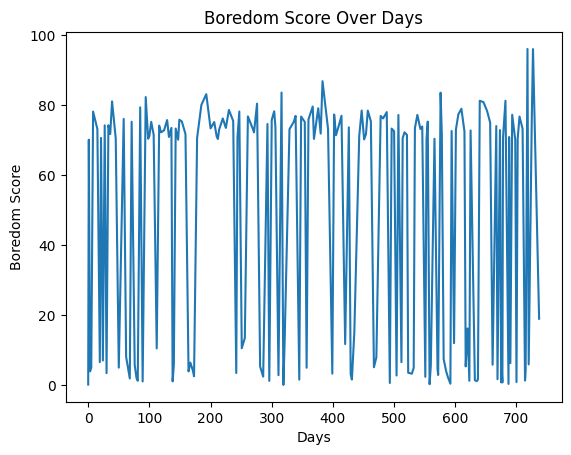

In [71]:
plt.plot(df3.index, df3['boredom_score'])
plt.title('Boredom Score Over Days')
plt.xlabel('Days')
plt.ylabel('Boredom Score')
plt.show()

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [ ]:
X = df3[['feedback_time', 'feedback_diff']]
y = df3['boredom_score']